In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from plotly import graph_objects as go 


#importando bibliotecas


In [3]:
#visualização dos dados

data = pd.read_csv('datasets/rest_data_us_upd.csv', dtype={'object_type':'category'})

data.head(10)

id          object_name                          address  chain  \
0  11786  HABITAT COFFEE SHOP           3708 N EAGLE ROCK BLVD  False   
1  11787             REILLY'S                100 WORLD WAY 120  False   
2  11788       STREET CHURROS          6801 HOLLYWOOD BLVD 253  False   
3  11789    TRINITI ECHO PARK               1814 W SUNSET BLVD  False   
4  11790               POLLEN               2100 ECHO PARK AVE  False   
5  11791       THE SPOT GRILL              10004 NATIONAL BLVD  False   
6  11792                  CPK                100 WORLD WAY 126  False   
7  11793             PHO LALA            3500 W 6TH ST STE 226  False   
8  11794           ABC DONUTS  3027 N SAN FERNANDO RD UNIT 103   True   
9  11795             UPSTAIRS             3707 N CAHUENGA BLVD  False   

  object_type  number  
0        Cafe      26  
1  Restaurant       9  
2   Fast Food      20  
3  Restaurant      22  
4  Restaurant      20  
5  Restaurant      14  
6  Restaurant     100  
7  Restaurant       7  
8   Fast Food       1  
9  Restaurant      35

In [4]:
#informações dos dados

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           9651 non-null   int64   
 1   object_name  9651 non-null   object  
 2   address      9651 non-null   object  
 3   chain        9648 non-null   object  
 4   object_type  9651 non-null   category
 5   number       9651 non-null   int64   
dtypes: category(1), int64(2), object(3)
memory usage: 386.8+ KB


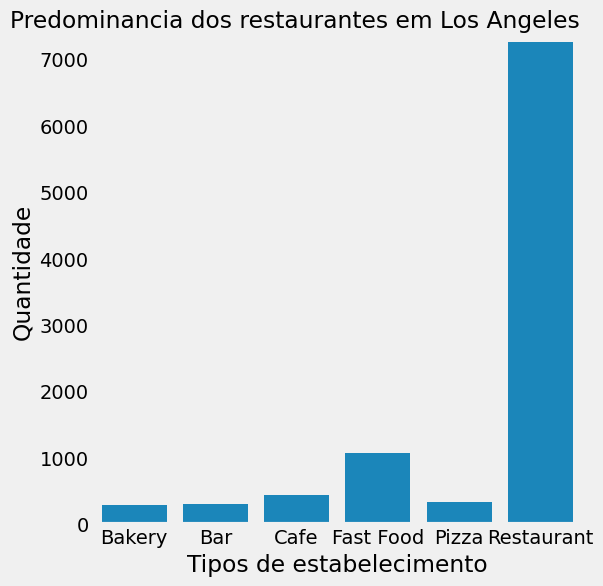

In [5]:
#criando o gráfico
plt.style.use('fivethirtyeight')
g = sns.catplot(data=data, x='object_type', kind='count', height=6)

#nomeando o gráfico
g.set_axis_labels("Tipos de estabelecimento", "Quantidade")
g.fig.suptitle("Predominancia dos restaurantes em Los Angeles")

#retirar o gride do gráfico
for ax in g.axes.flat:
    ax.grid(False)

#apresentar gráfico
plt.show()

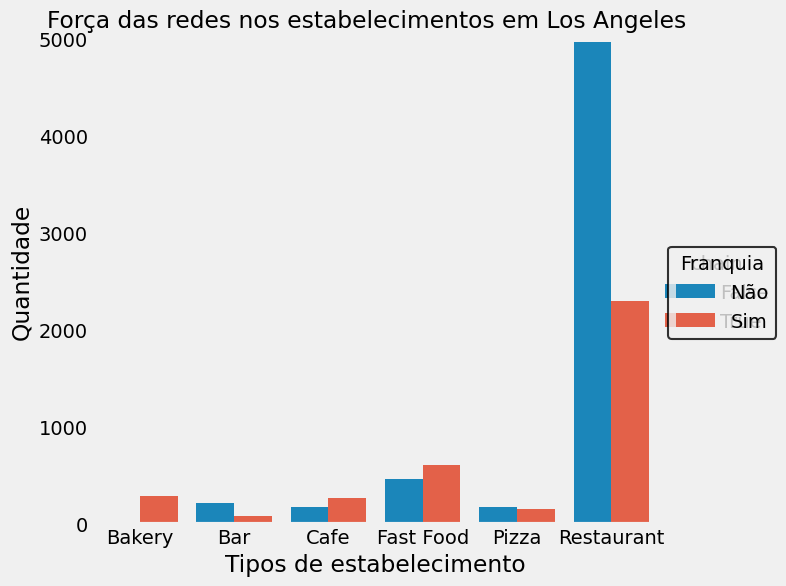

In [6]:
#criando o gráfico
plt.style.use('fivethirtyeight')
g = sns.catplot(data=data, x='object_type', kind='count', height=6, hue='chain')

#nomeando o gráfico
g.set_axis_labels("Tipos de estabelecimento", "Quantidade")
g.fig.suptitle("Força das redes nos estabelecimentos em Los Angeles")

#retirar o gride do gráfico
for ax in g.axes.flat:
    ax.grid(False)

#legenda
g.add_legend(title='Franquia')                      #adiciona a legenda com o título franquia
legend = g.legend                                   #obtem a legenda do gráfico 
legend.set_title('Franquia')                        #define o titulo da legenda
legend.set_frame_on(True)                           #adiciona uma bora à legenda
legend.get_frame().set_edgecolor('black')           #define a cor da borda da legenda
legend.get_frame().set_linewidth(1.5)               #define a largura da borda da legenda

#ajustando o rótulo da legenda
for text in legend.get_texts():
    if text.get_text() == 'False':
        text.set_text('Não')
    elif text.get_text() == 'True':
        text.set_text('Sim')
        
#apresentar gráfico
plt.show()

Pode-se notar que no ramo de Bakery as franquias tem total controle do mercado

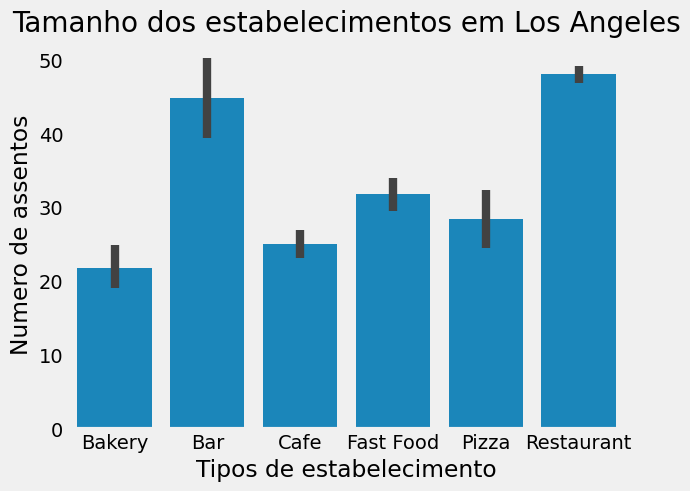

In [7]:
plt.style.use('fivethirtyeight')

ax = sns.barplot(x='object_type', y='number', data=data)

#nomeando o gráfico
ax.set_xlabel("Tipos de estabelecimento")
ax.set_ylabel("Numero de assentos")
ax.set_title("Tamanho dos estabelecimentos em Los Angeles")

#retirar o gride do gráfico
ax.grid(False)

In [8]:
print(data['address'].value_counts())

address
3607 TROUSDALE PKWY             11
135 N GRAND AVE                 10
400 WORLD WAY                    9
5151 STATE UNIVERSITY DR         9
600 WORLD WAY                    9
                                ..
175 S FAIRFAX AVE                1
3700 W OLYMPIC BLVD STE #101     1
12746 JEFFERSON BLVD             1
3600 WILSHIRE BLVD STE 100B      1
1300 S SAN PEDRO ST STE 111      1
Name: count, Length: 8512, dtype: int64


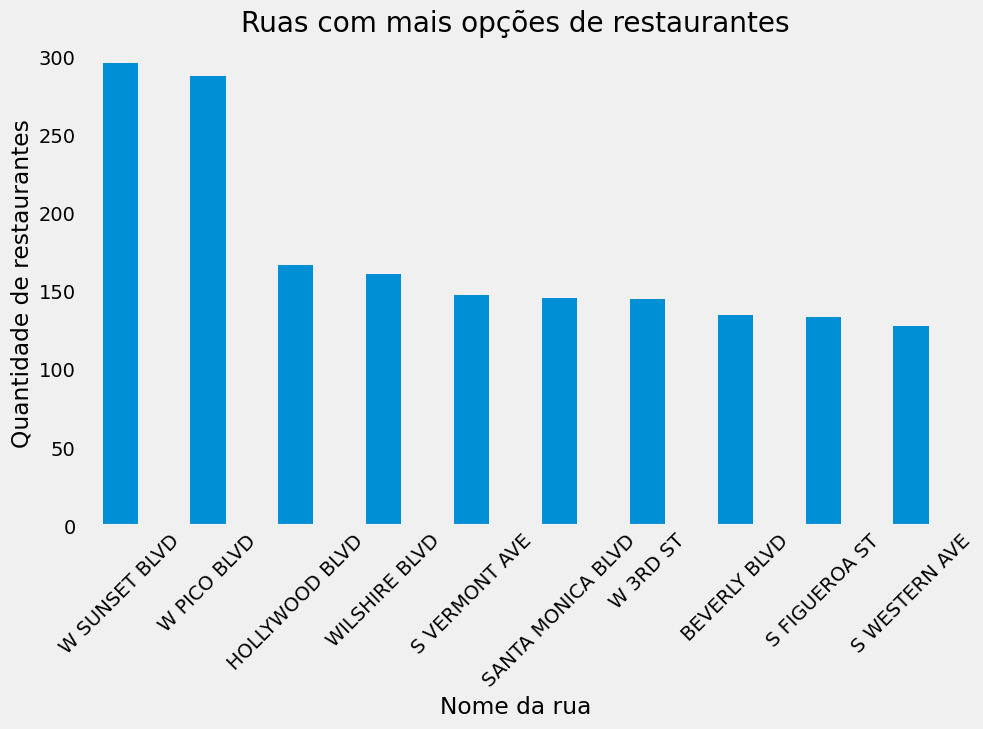

In [9]:
#criando funcao que removera o numero do endereço
def remove_num(text):
    words = text.split()
    return " ".join(words[1:])

#aplicando a funcao no df e criando a coluna com os nomes das ruas
data['street'] = data['address'].apply(remove_num)


#criando o Series com as ruas com maior numero de estabelecimentos
best_street_to_eat = data['street'].value_counts().head(10)

#plotando
fig,ax = plt.subplots(figsize=(10,6))
ax = best_street_to_eat.plot(kind='bar', width=0.4, ax=ax)

#adicionando titulo e rótulos
ax.set_title('Ruas com mais opções de restaurantes')
ax.set_xlabel("Nome da rua")
ax.set_ylabel("Quantidade de restaurantes")
ax.grid(False)
plt.xticks(rotation=45)
plt.show()

In [10]:
one_place_to_eat = data['street'].value_counts()

print(one_place_to_eat[one_place_to_eat<2])

street
W 6TH ST STE #223         1
S WESTERN AVE STE 112     1
E 12TH ST STE #409        1
MAPLE AVE 6               1
W PICO BLVD #2            1
                         ..
W 6TH ST STE 104-5        1
WORLD WAY #4708           1
POMONA BLVD 101           1
WILSHIRE BLVD STE #1      1
S SAN PEDRO ST STE 111    1
Name: count, Length: 2445, dtype: int64


In [11]:
streets = best_street_to_eat.index
print(streets)

Index(['W SUNSET BLVD', 'W PICO BLVD', 'HOLLYWOOD BLVD', 'WILSHIRE BLVD',
       'S VERMONT AVE', 'SANTA MONICA BLVD', 'W 3RD ST', 'BEVERLY BLVD',
       'S FIGUEROA ST', 'S WESTERN AVE'],
      dtype='object', name='street')


AttributeError: 'JointGrid' object has no attribute 'set_title'

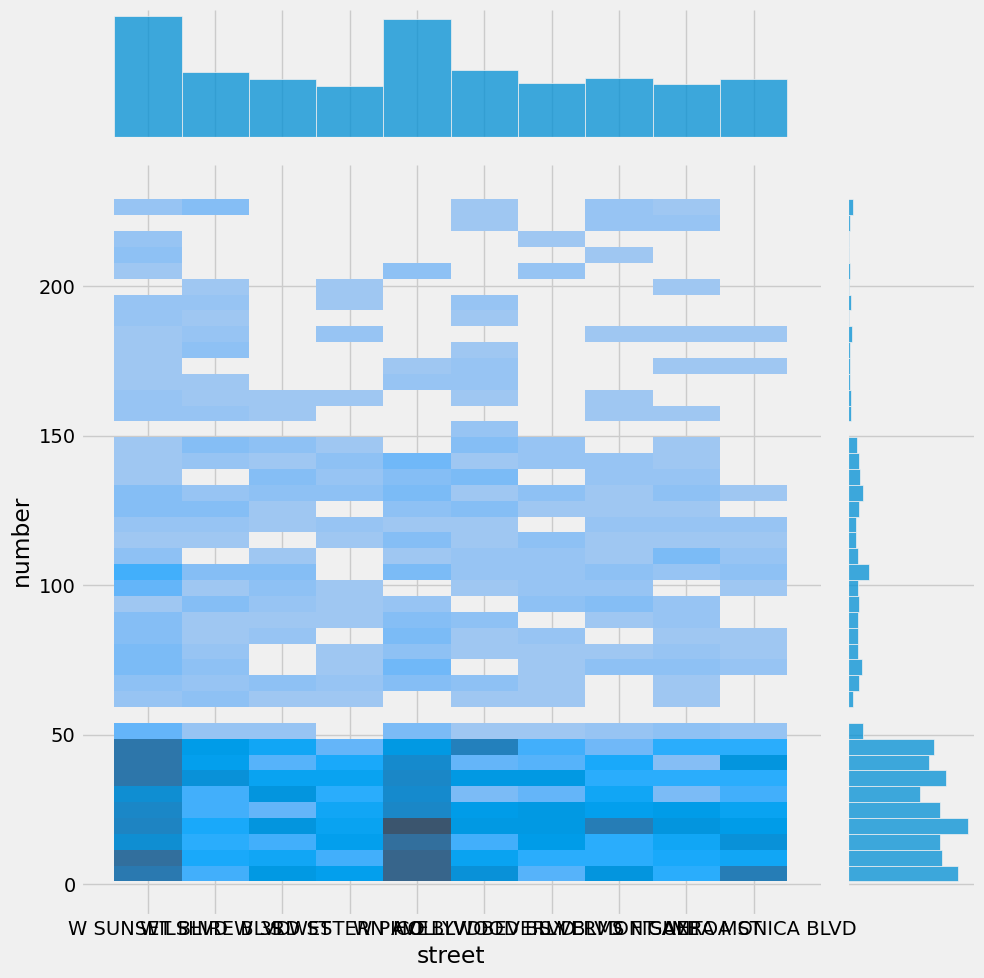

In [23]:
#filtrar restaurantes nas ruas com mais restaurantes
data_filtered = data[data['street'].isin(streets)]

#contruir gráfico

ax = sns.jointplot(x='street', y='number', data=data_filtered, kind='hist', height=10)
ax.set_title("Distribuição de assentos nos restaurantes das ruas mais badaladas")
plt.xticks(rotation=90)
plt.show()